In [1]:
# Title:  Challenge: kNN in R

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  caret,         # Train/test functions
  e1071,         # Machine learning functions
  GGally,        # Plotting
  magrittr,      # Pipes
  mlbench,       # BreastCancer dataset
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpBPSroa/downloaded_packages



mlbench installed



In [2]:
# Set random seed to reproduce the results
set.seed(1)

In [3]:
# LOAD AND PREPARE DATA ####################################

# Use the `BreastCancer` dataset from the `mlbench` package

# Get info on dataset
?BreastCancer

BreastCancer              package:mlbench              R Documentation

_W_i_s_c_o_n_s_i_n _B_r_e_a_s_t _C_a_n_c_e_r _D_a_t_a_b_a_s_e

_D_e_s_c_r_i_p_t_i_o_n:

     The objective is to identify each of a number of benign or
     malignant classes. Samples arrive periodically as Dr. Wolberg
     reports his clinical cases.  The database therefore reflects this
     chronological grouping of the data.  This grouping information
     appears immediately below, having been removed from the data
     itself.  Each variable except for the first was converted into 11
     primitive numerical attributes with values ranging from 0 through
     10.  There are 16 missing attribute values. See cited below for
     more details.

_U_s_a_g_e:

     data(BreastCancer)
     
_F_o_r_m_a_t:

     A data frame with 699 observations on 11 variables, one being a
     character variable, 9 being ordered or nominal, and 1 target
     class.

       [,1]   Id               Sample code number          
       [,2]   Cl.thickness     Clump Thickness             
       [,3]   Cell.size        Uniformity of Cell Size     
       [,4]   Cell.shape       Uniformity of Cell Shape    
       [,5]   Marg.adhesion    Marginal Adhesion           
       [,6]   Epith.c.size     Single Epithelial Cell Size 
       [,7]   Bare.nuclei      Bare Nuclei                 
       [,8]   Bl.cromatin      Bland Chromatin             
       [,9]   Normal.nucleoli  Normal Nucleoli             
       [,10]  Mitoses          Mitoses                     
       [,11]  Class            Class                       
      
_S_o_u_r_c_e:

        • Creator: Dr. WIlliam H. Wolberg (physician); University of
          Wisconsin Hospital ;Madison; Wisconsin; USA

        • Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)

        • Received: David W. Aha (aha@cs.jhu.edu)

     These data have been taken from the UCI Repository Of Machine
     Learning Databases at

        • <URL: ftp://ftp.ics.uci.edu/pub/machine-learning-databases>

        • <URL: http://www.ics.uci.edu/~mlearn/MLRepository.html>

     and were converted to R format by Evgenia Dimitriadou.

_R_e_f_e_r_e_n_c_e_s:

     1. Wolberg,W.H., \& Mangasarian,O.L. (1990). Multisurface method
     of pattern separation for medical diagnosis applied to breast
     cytology. In Proceedings of the National Academy of Sciences, 87,
     9193-9196.
     - Size of data set: only 369 instances (at that point in time)
     - Collected classification results: 1 trial only
     - Two pairs of parallel hyperplanes were found to be consistent
     with 50% of the data
     - Accuracy on remaining 50% of dataset: 93.5%
     - Three pairs of parallel hyperplanes were found to be consistent
     with 67% of data
     - Accuracy on remaining 33% of dataset: 95.9%

     2. Zhang,J. (1992). Selecting typical instances in instance-based
     learning.  In Proceedings of the Ninth International Machine
     Learning Conference (pp. 470-479).  Aberdeen, Scotland: Morgan
     Kaufmann.
     - Size of data set: only 369 instances (at that point in time)
     - Applied 4 instance-based learning algorithms
     - Collected classification results averaged over 10 trials
     - Best accuracy result:
     - 1-nearest neighbor: 93.7%
     - trained on 200 instances, tested on the other 169
     - Also of interest:
     - Using only typical instances: 92.2% (storing only 23.1
     instances)
     - trained on 200 instances, tested on the other 169

     Newman, D.J. & Hettich, S. & Blake, C.L. & Merz, C.J. (1998).  UCI
     Repository of machine learning databases
     [http://www.ics.uci.edu/~mlearn/MLRepository.html]. Irvine, CA:
     University of California, Department of Information and Computer
     Science.

_E_x_a_m_p_l_e_s:

     data(BreastCancer)
     summary(BreastCancer)

In [4]:
# Load data
data(BreastCancer)

# Summarize raw data
summary(BreastCancer)

      Id             Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 Length:699         1      :145   1      :384   1      :353   1      :407  
 Class :character   5      :130   10     : 67   2      : 59   2      : 58  
 Mode  :character   3      :108   3      : 52   10     : 58   3      : 58  
                    4      : 80   2      : 45   3      : 56   10     : 55  
                    10     : 69   4      : 40   4      : 44   4      : 33  
                    2      : 50   5      : 30   5      : 34   8      : 25  
                    (Other):117   (Other): 81   (Other): 95   (Other): 63  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :386   1      :402   2      :166   1      :443     1      :579  
 3      : 72   10     :132   3      :165   10     : 61     2      : 35  
 4      : 48   2      : 30   1      :152   3      : 44     3      : 33  
 1      : 47   5      : 30   7      : 73   2      : 36     10     : 14  
 6      : 41   3      : 28 

In [5]:
# Prepare data
df <- BreastCancer %>%   # Save to `df`
  select(-Id) %>%        # Remove `Id` 
  rename(y = Class) %>%  # Rename `Class` to `y`
  mutate(                # Modify several variables
    across(              # Select several variables
      -y,                # Select all except `y`
      as.numeric         # Convert selected vars to numeric
    )
  ) %>%
  na.omit() %>%          # Omit cases with missing data
  as_tibble() %>%        # Save as tibble
  print()                # Show data in Console

# A tibble: 683 x 10
   Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size Bare.nuclei
          <dbl>     <dbl>      <dbl>         <dbl>        <dbl>       <dbl>
 1            5         1          1             1            2           1
 2            5         4          4             5            7          10
 3            3         1          1             1            2           2
 4            6         8          8             1            3           4
 5            4         1          1             3            2           1
 6            8        10         10             8            7          10
 7            1         1          1             1            2          10
 8            2         1          2             1            2           1
 9            2         1          1             1            2           1
10            4         2          1             1            2           1
# … with 673 more rows, and 4 more variables: Bl.cromatin <dbl>,
# 

In [6]:
# Split data into training (trn) and testing (tst) sets
df %<>% mutate(ID = row_number())  # Add row ID
trn <- df %>%                      # Create trn
  slice_sample(prop = .70)         # 70% in trn
tst <- df %>%                      # Create tst
  anti_join(trn, by = "ID") %>%    # Remaining data in tst
  select(-ID)                      # Remove id from tst
trn %<>% select(-ID)               # Remove id from trn
df %<>% select(-ID)                # Remove id from df

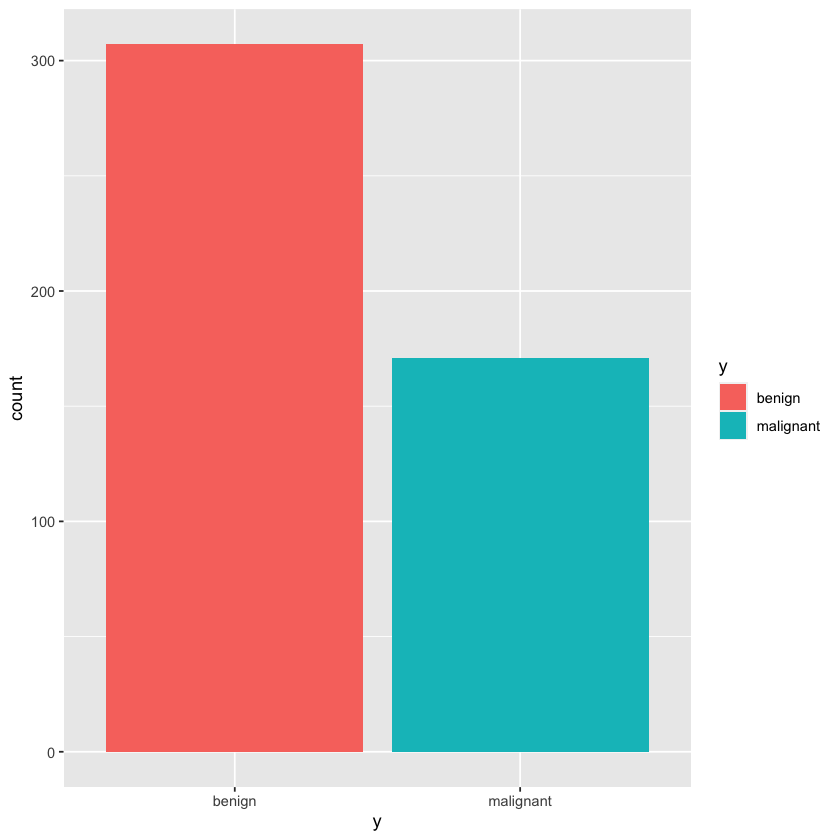

In [7]:
# EXPLORE TRAINING DATA ####################################

# Bar chart of `y`
trn %>%
  ggplot() + 
  geom_bar(aes(x = y, fill = y)) 

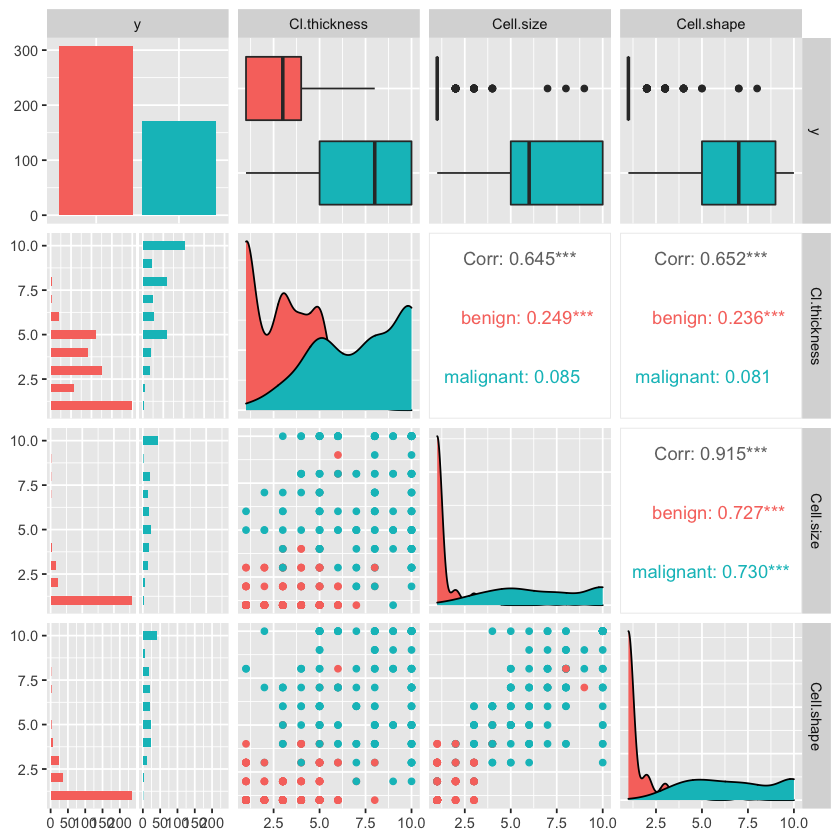

In [8]:
# Randomly select a few variables and look at their plots
# in particular look at the first column and first row
trn %>% 
  select(y, 1:3)  %>%
  ggpairs(
    aes(color = trn$y),  # Color by class
    lower = list(
      combo = wrap(
        "facethist", 
        binwidth = 0.5
      )
    )
  )

In [9]:
# COMPUTE KNN MODEL ON TRAINING DATA #######################

# Define parameters
statctrl <- trainControl(
  method  = "repeatedcv",  # Repeated cross-validation
  number  = 5,             # Number of folds
  repeats = 3              # Number of sets of folds
)  

# Set up parameters to try while training
k = rep(seq(3, 20, by = 2), 2)

# Apply model to training data (takes a moment)
fit <- train(
  y ~ ., 
  data = trn,                        # Use training data
  method = "knn",                    # kNN training method
  trControl = statctrl,              # Control parameters
  tuneGrid = data.frame(k),          # Search grid param
  preProcess = c("center","scale"),  # Preprocess
  na.action = "na.omit"
)

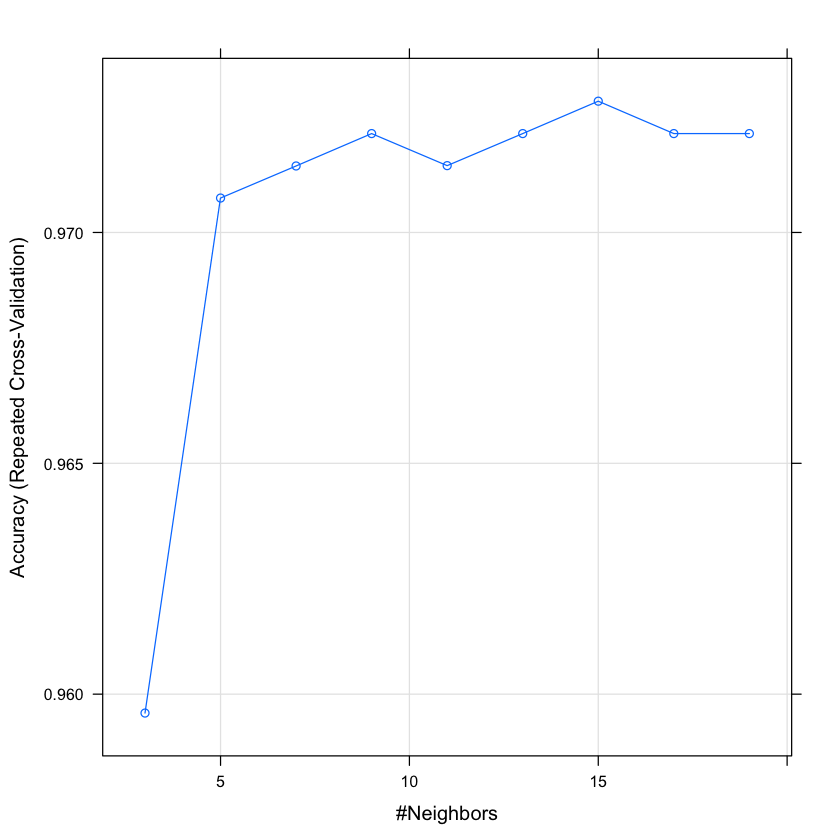

In [10]:
# Plot accuracy against various k values
fit %>% plot()                # Automatic range on y

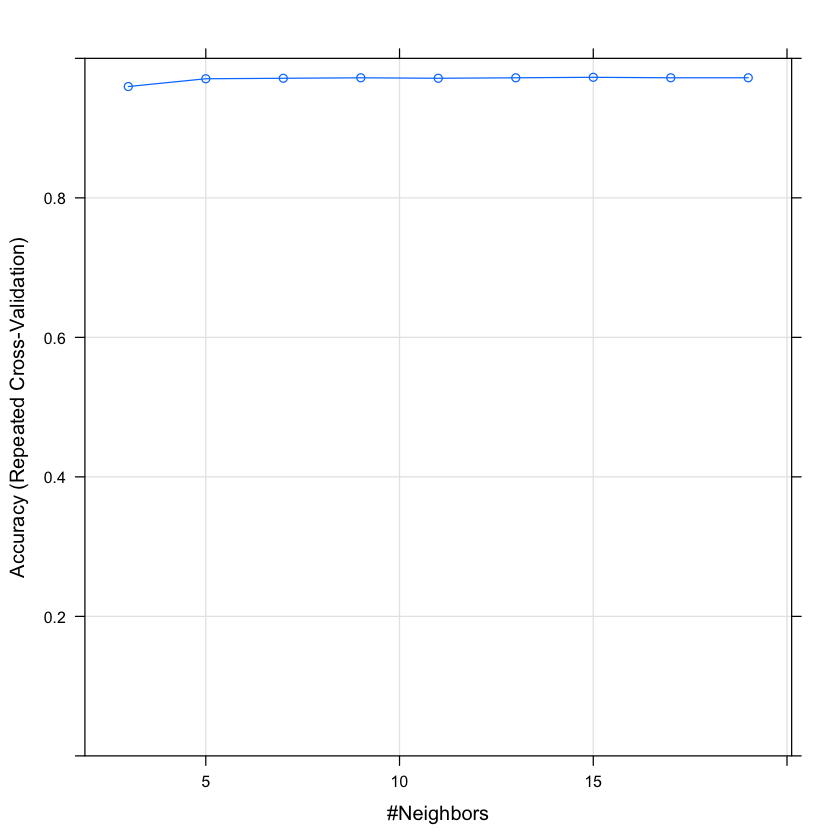

In [11]:
fit %>% plot(ylim = c(0, 1))  # Plot with 0-100% range

In [12]:
# Print the final model
fit %>% print()

k-Nearest Neighbors 

478 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 383, 382, 383, 382, 382, 382, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.9595906  0.9120914
   5  0.9707456  0.9366503
   7  0.9714401  0.9380783
   9  0.9721418  0.9394024
  11  0.9714474  0.9379151
  13  0.9721418  0.9393378
  15  0.9728436  0.9408933
  17  0.9721418  0.9393566
  19  0.9721418  0.9393371

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 15.


In [13]:
# APPLY MODEL TO TEST DATA #################################

# Predict test set
pred <- predict(    # Create new variable ("predicted")
  fit,              # Apply saved model
  newdata = tst     # Use test data
)

In [14]:
# Get the confusion matrix
cm <- pred %>%
  confusionMatrix(reference = tst$y)

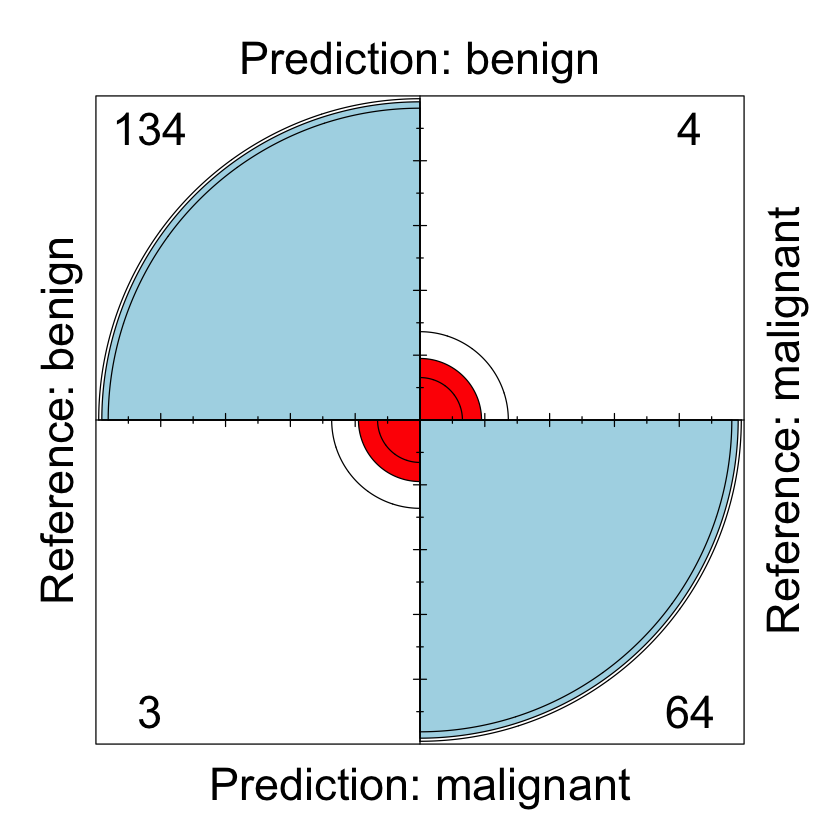

In [15]:
# View the confusion matrix
cm$table %>% 
  fourfoldplot(color = c("red", "lightblue"))

In [16]:
# Print the confusion matrix
cm %>% print()

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign       134         4
  malignant      3        64
                                          
               Accuracy : 0.9659          
                 95% CI : (0.9309, 0.9862)
    No Information Rate : 0.6683          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9227          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9781          
            Specificity : 0.9412          
         Pos Pred Value : 0.9710          
         Neg Pred Value : 0.9552          
             Prevalence : 0.6683          
         Detection Rate : 0.6537          
   Detection Prevalence : 0.6732          
      Balanced Accuracy : 0.9596          
                                          
       'Positive' Class : benign          